# <font color='purple'>05-MeanMolecularWeight</font> (template)

We start by importing the modules
* Numpy -- operations on arrays and matrixes (and pi)
* Matplotlib pyplot -- plotting library
* Astropy units -- defined quantities with units. We also import the CDS conversions

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 
from astropy import constants as const
import astropy.units as u
from astropy.units import cds
cds.enable() 

## 1. In class: Solar abundances

In the 05-Grevesse.txt file, you will find a tabulation of the solar abundances for the first 30 elements that looks like this:

<div style="width:600px;height:200px;padding:2px;border:1px dotted black;">
<PRE> 
# Abundance from Grevesse					
Z   A       Element   NumberFraction    logAbund    X
1   1.0079  H         1.00E+00          1.20E+01    7.04E-01
2   4.0026  He        1.00E-01          1.10E+01    2.80E-01
3   6.941   Li        1.26E-11          1.10E+00    6.10E-11
4   9.0122  Be        2.51E-11          1.40E+00    1.58E-10
....
</PRE>
</div>

### a. We will first learn how to read in a data file, using a Numpy function

In [ ]:
dtype="i8,f8,|U8,f8,f8,f8"
# If using "S8" for the element string, 
# numpy will use bytestring, which need to be decoded
# before using in mathplotlib -- using U8 here instead
url = 'https://raw.githubusercontent.com/veropetit/PHYS633-S2022/main/L05-MeanMolecularWeight/05-Grevesse.txt'
#---------------------------------------
#---------------------------------------
# In class

# How to read a data file

AbundSol = np.genfromtxt(url, skip_header=1, names=True, dtype=dtype)


### b. Now let's see what the abundance pattern looks like

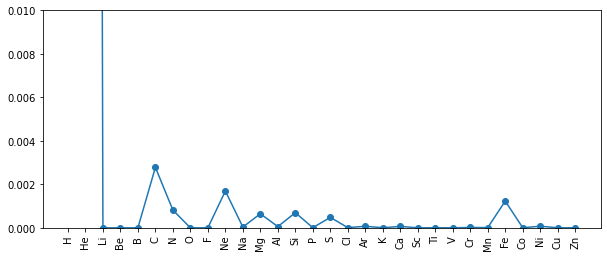

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,4))
ax.set_ylim(0,0.01)

#---------------------------------------
#---------------------------------------
# In class

ax.scatter(AbundSol['Z'], AbundSol['X'])
ax.plot(AbundSol['Z'], AbundSol['X'])

# We can set the labels in the plots to the name of the elements!

ax.set_xticks(AbundSol['Z'])
ax.set_xticklabels(AbundSol['Element'], rotation=90);

> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

Most of the elements in a sun are Hydrogen and Helium. Past that we see small peaks at certain elements such as carbon and neon.

## 2. In class: what is the mean molecular weight for solar abundance?

Let's calculate the value for the mean molecular weight using the $X_i$ in our abundance table. 

We found that:

$$ \frac{1}{\mu} = \frac{1}{\mu_\mathrm{ion}} + \frac{1}{\mu_\mathrm{e}},$$
with

$$ \frac{1}{\mu_\mathrm{ion}} = \sum_i \frac{X_i}{A_i}$$

and

$$ \frac{1}{\mu_\mathrm{e}} = \sum_i \frac{Z_i X_i}{A_i} y_i $$

Let's consider two cases:


### a. The gas is completely neutral

> **TODO**: write a few words about how the equations above can be simplified for a completely neutral gas

The equation can be simplified by noting that the number of ionized particles would be 0. So the equation would simply be:

$$ \frac{1}{\mu} = \sum_i \frac{Z_i X_i}{A_i} y_i $$

### b. The gas is completely ionized

> **TODO**: write a few words about how the equations above can be simplified for a completely ionized gas

The opposite would be true here. The equation would simplify to:

$$ \frac{1}{\mu} = \sum_i \frac{X_i}{A_i}$$

In [ ]:
#---------------------------------------
#---------------------------------------
# In class



> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

## 3. At home: What will $\mu$ be at the center of the Sun once all the H is converted into He?

> **TODO**: Make a calulation of the mean molecular weight in the core of the Sun, once all of the hydrogen has been converted into helium (remember, at the surface of the Sun where there is no nuclear reactions: $X$=70%, $Y$=28%, and $Z$=2%)
>
> You can use the approximations I gave in the last slide of the PDF class notes
>
> You can use the code cell below as a calculator, or you can do the calculation by hand.


At the center of the Sun, let's assume that everything is ionized. 

I will also assume that the total mass of the hydrogen was converted into the new total mass of helium (which is not exactly true, as a small fraction of that mass get converted into energy!)

Therefore Y will become X, and X will become zero.

In [ ]:
#---------------------------------------
#---------------------------------------
# At home

X = 0
Y = 0.7
Z = 0.02

mu_neutral = 1 / (X + Y/4)

mu_ion = 2 / (3*X + Y/2 + 1)

print('The neutral mean molecular weight is: ' + str(mu_neutral))
print('The ionized mean molecular weight is: ' + str(mu_ion))



The neutral mean molecular weight is: 5.714285714285714
The ionized mean molecular weight is: 1.4814814814814814


> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

## 4. At home: Finally, let's check what the mean molecular weight looks like inside of the sun

### a. Let's use the MESA model to look at $\mu$ as a function of radius inside of the Sun.

> **TODO**: Based on the MESA model for the Sun, I provide an array `mu` that contains the mean molecular weigth. Create a plot of the mean molecular weight as a function of $r/R_\star$. The corresponding array for the $r/R_\star$ is called `r_rs`

### b. In the interpretation, explain the shape of the curve

You might find it interesting to look at the variation of the temperature `data['logT']` to help you with your interpretation -- you might find it enlightening!


Text(0, 0.5, '$\\mu$')

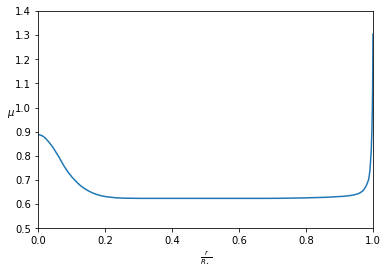

In [ ]:
def read_model(file):
    # Here's a function that reads it the MESA model.
    cols = np.array([1,2,3,4,5,9,29,66])-1
    return np.genfromtxt(file, skip_header=5, names=True, usecols = cols)
# Reading the model
data = read_model('https://raw.githubusercontent.com/veropetit/PHYS633-S2022/main/L05-MeanMolecularWeight/05-MESAdatafile.txt')

# Calculating mu using the density (in cgs), the temperature (in K) and the gas pressure 
mu = 10**data['logRho'] * u.g / u.cm**3 * const.k_B * 10**data['logT'] * u.K / (10**data['logPgas']*u.Ba) / const.u
mu = mu.decompose() # Should be unitless.

r_rs = 10**(data['logR']-data['logR'][0])

#---------------------------------------
#---------------------------------------
# At home

fig, ax = plt.subplots(1, 1, figsize=(6,4))

ax.plot(r_rs, mu, label='$r\mu$')

ax.set_xlabel(r'$\frac{r}{R_\star}$')
ax.set_xlim(0,1)
ax.set_ylim(0.5, 1.4)

ax.set_ylabel(r'$\mu$', rotation=0) 

> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

The mean molecular weight starts at around 0.9 then dips to about 0.63. It remains steady for the remainder of the star until it gets close to the surface and then peaks up to around 1.3. This means that the surface composition of the start and the core of the star are different from what the rest of the star is made of.

## 5. Reading assignement: "what can we measure about stars" -- part 3
In this graduate course, we are making an advanced physical and mathematical model of star.

But it is still good to learn and/or remind ourselves about which physical characteristics of stars we can actually measure. You might have covered some of this in some details in previous physics or astro courses (at UD PHYS 133, 144, 333, or 469) -- but it is still a good idea to have a quick look at the suggested reading below before crafting your paragraph.

One other thing that can be measured is the composition of a star's surface.

> **TODO**: Have a look at section 5.3 Spectroscopy in Astronomy, 5.4
The Structure of the Atom and/or 5.5 Formation of Spectral Lines of the Open Stack Astronomy online [textbook](https://openstax.org/books/astronomy/pages/5-2-the-electromagnetic-spectrum), and write a short conceptual paragraph about how astronomer can determine the composition of stars through spectra. 

One can determine the composition of a star through the sepectra  it exhibits. Certain elements show spectra lines at certain wavelengths. The intensity and abundance of these lines emphasizes how much of an element is present and can also determine which elements exist.